In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Saskia\Desktop\new'

In [3]:
full_merge = pd.read_pickle(r'C:\Users\Saskia\Desktop\new\02 Data\Prepared Data\Full_data.pkl')

In [4]:
full_merge.shape

(16153014, 36)

In [5]:
full_merge.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,...,first_name,Surnam,gender,state,age,date_joined,#_dependants,marital_status,income,#_depndants
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,65,9,prior,16,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,-103,9,prior,2,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,113,9,prior,4,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,-67,9,prior,6,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,-12,9,prior,7,...,Nicole,Conrad,Male,District of Columbia,79,1/16/2020,3,married,154743,3


In [6]:
full_merge.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_time_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'busiest_day',
       'busiest days', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spending', 'spending_flag',
       'purchase_frequency', 'frequency_flag', 'first_name', 'Surnam',
       'gender', 'state', 'age', 'date_joined', '#_dependants',
       'marital_status', 'income', '#_depndants'],
      dtype='object')

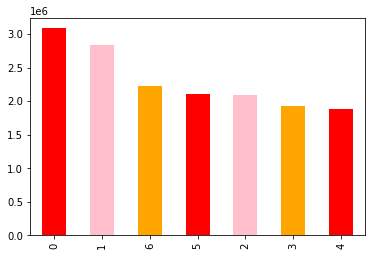

In [7]:
# Create a bar chart

bar = full_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'pink', 'orange'])

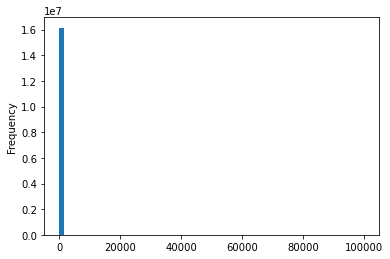

In [8]:
# Create Histogram

hist = full_merge['prices'].plot.hist(bins = 70)

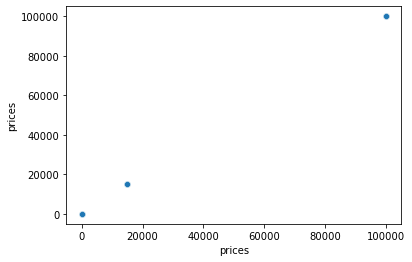

In [9]:
# Create Scatterplot

splot = sns.scatterplot(x = 'prices', y = 'prices', data = full_merge)

In [10]:
np.random.seed(4)

In [12]:
dev = np.random.rand(len(full_merge)) <= 0.7

In [13]:
dev

array([False,  True, False, ..., False,  True, False])

In [15]:
big = full_merge[dev]

In [17]:
small = full_merge[~dev]

In [18]:
# Store 70% as big

big = full_merge[dev]

In [19]:
# store 30% as small

small = full_merge[~dev]

In [20]:
len(full_merge)

16153014

In [21]:
len(big) + len(small)

16153014

In [22]:
# Dataframe for line chart

full_merge_1 = small[['orders_day_of_week','prices']]

In [23]:
full_merge_1

,orders_day_of_week,prices
0,1,5.8
2,4,5.8
3,1,5.8
6,1,5.8
10,1,5.8
...,...,...
16152996,2,13.2
16153003,1,13.2
16153010,1,13.2
16153011,0,13.2


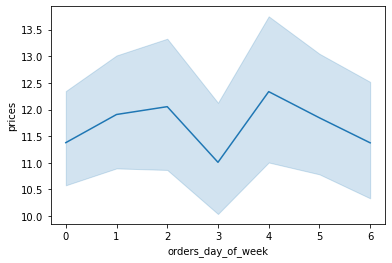

In [24]:
# Creating line chart for 30%

line = sns.lineplot(data = full_merge_1, x = 'orders_day_of_week',y = 'prices')

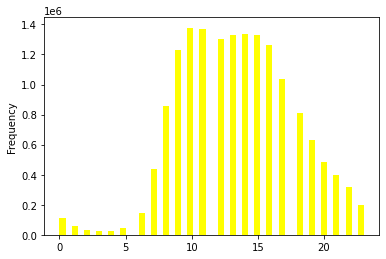

In [26]:
# Creating Histogram

hist_2 = full_merge['order_time_of_day'].plot.hist(bins = 50, color = 'yellow')

In [27]:
# Most orders are placed between 10:00am to 15:00pm and orders are very low from midnight to about 6:00am.



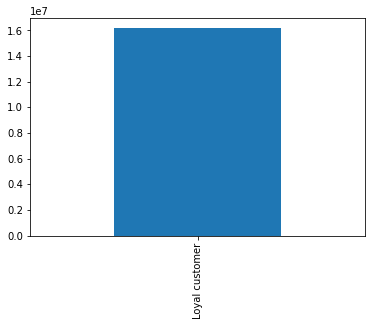

In [28]:
# Creating a bar chart for loyalty customers

bar = full_merge['loyalty_flag'].value_counts().plot.bar()

In [29]:
full_merge_2 = small[['order_time_of_day','prices']]

In [30]:
full_merge_2

,order_time_of_day,prices
0,7,5.8
2,11,5.8
3,14,5.8
6,13,5.8
10,13,5.8
...,...,...
16152996,12,13.2
16153003,14,13.2
16153010,9,13.2
16153011,7,13.2


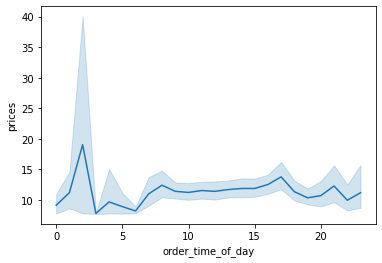

In [32]:
# Creating line chart for 30%

line_2 = sns.lineplot(data = full_merge_2, x = 'order_time_of_day',y = 'prices')

In [34]:
# Spending is much in the earlier hours which also has a smaller size of order. Moreover there is higher orders with lower expenditure during afternoons.

In [35]:
full_merge_3 = small[['age','#_dependants']]

In [36]:
full_merge_3

,age,#_dependants
0,79,3
2,79,3
3,79,3
6,79,3
10,79,3
...,...,...
16152996,50,1
16153003,50,1
16153010,50,1
16153011,50,1


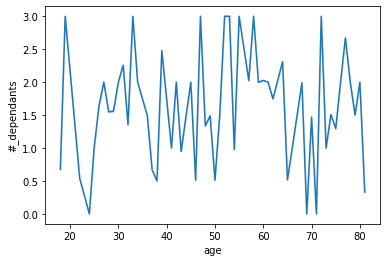

In [37]:
# Creating line chart for 30%

line_3 = sns.lineplot(data = full_merge_3, x = 'age',y = '#_dependants')

In [38]:
full_merge_3['#_dependants'].describe()

count    4.844333e+06
mean     1.616459e+00
std      1.136868e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: #_dependants, dtype: float64

In [39]:
# There is no connection between age and dependancy.

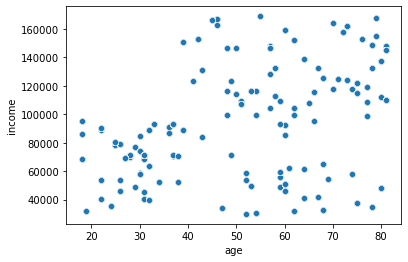

In [40]:
# connection between age and spending power

scatter_2 = sns.scatterplot(x = 'age', y = 'income', data = full_merge)

In [42]:
# Exporting Charts

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_Orders_day_of_week'))

In [43]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'histogram_prices'))

In [44]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'histogram_order_time_of_day'))

In [45]:
splot.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'splot_prices'))

In [46]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_day_of_week'))

In [47]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_order_time_of_day'))

In [48]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line-dependants'))

In [50]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_age_income'))